In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch


In [2]:
d_sorts = ["d-pb", "d-rr"]


In [3]:
def exp_maker(lr, sorter, seed):
    return f"{sorter}-node-64-lr-{lr}-B-64-seed-{seed}"


In [4]:
B = 64
lrs = [str(i) for i in [5e-4, 1e-3, 5e-3, 1e-2]]
results = {lr: {s: [] for s in d_sorts} for lr in lrs}

for s in d_sorts:
    for seed in range(3):
        for lr in lrs:
            exp_details = exp_maker(lr, s, seed)
            exp_folder = f"..{os.sep}..{os.sep}results{os.sep}lenet-cifar10-sim-1{os.sep}{exp_details}"
            r = torch.load(f"{exp_folder}{os.sep}results.pt", map_location='cpu')
            results[lr][s].append(r)


In [5]:
def down_sampling(len_sampling, data):
    start = 0
    end = len_sampling
    len_data = len(data)
    ret = []
    while end <= len_data:
        data_chunk = data[start:end]
        start += len_sampling
        end += len_sampling
        ret.append(torch.mean(torch.as_tensor(data_chunk)))
    return torch.as_tensor(ret)


In [6]:
def plot_res(ax, s, label, train_test, loss_acc, lr, color=None):
    res = []
    for arr in results[lr][s]:
        if train_test == 'train':
            res.append(torch.tensor(arr[train_test][loss_acc]))
        else:
            res.append(torch.tensor(arr[train_test][loss_acc]))
    end_pos = len(torch.tensor(results[lr][s][0][train_test][loss_acc])) + 1
    res = torch.vstack(res).numpy()
    mean = res.mean(axis=0)
    std = res.std(axis=0)
    if color:
        ax.plot(np.arange(1, end_pos, 1), mean, label=label, markersize=5, color=color, linewidth=1)    
    else:
        ax.plot(np.arange(1, end_pos, 1), mean, label=label, markersize=5, linewidth=1)    
    ax.fill_between(
        np.arange(1, end_pos, 1), (mean - std), (mean + std), alpha=0.1)


In [7]:
lr_labels = ['5e-4', '1e-3', '5e-3', '1e-2']

/tmp/ipykernel_698887/2985130947.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


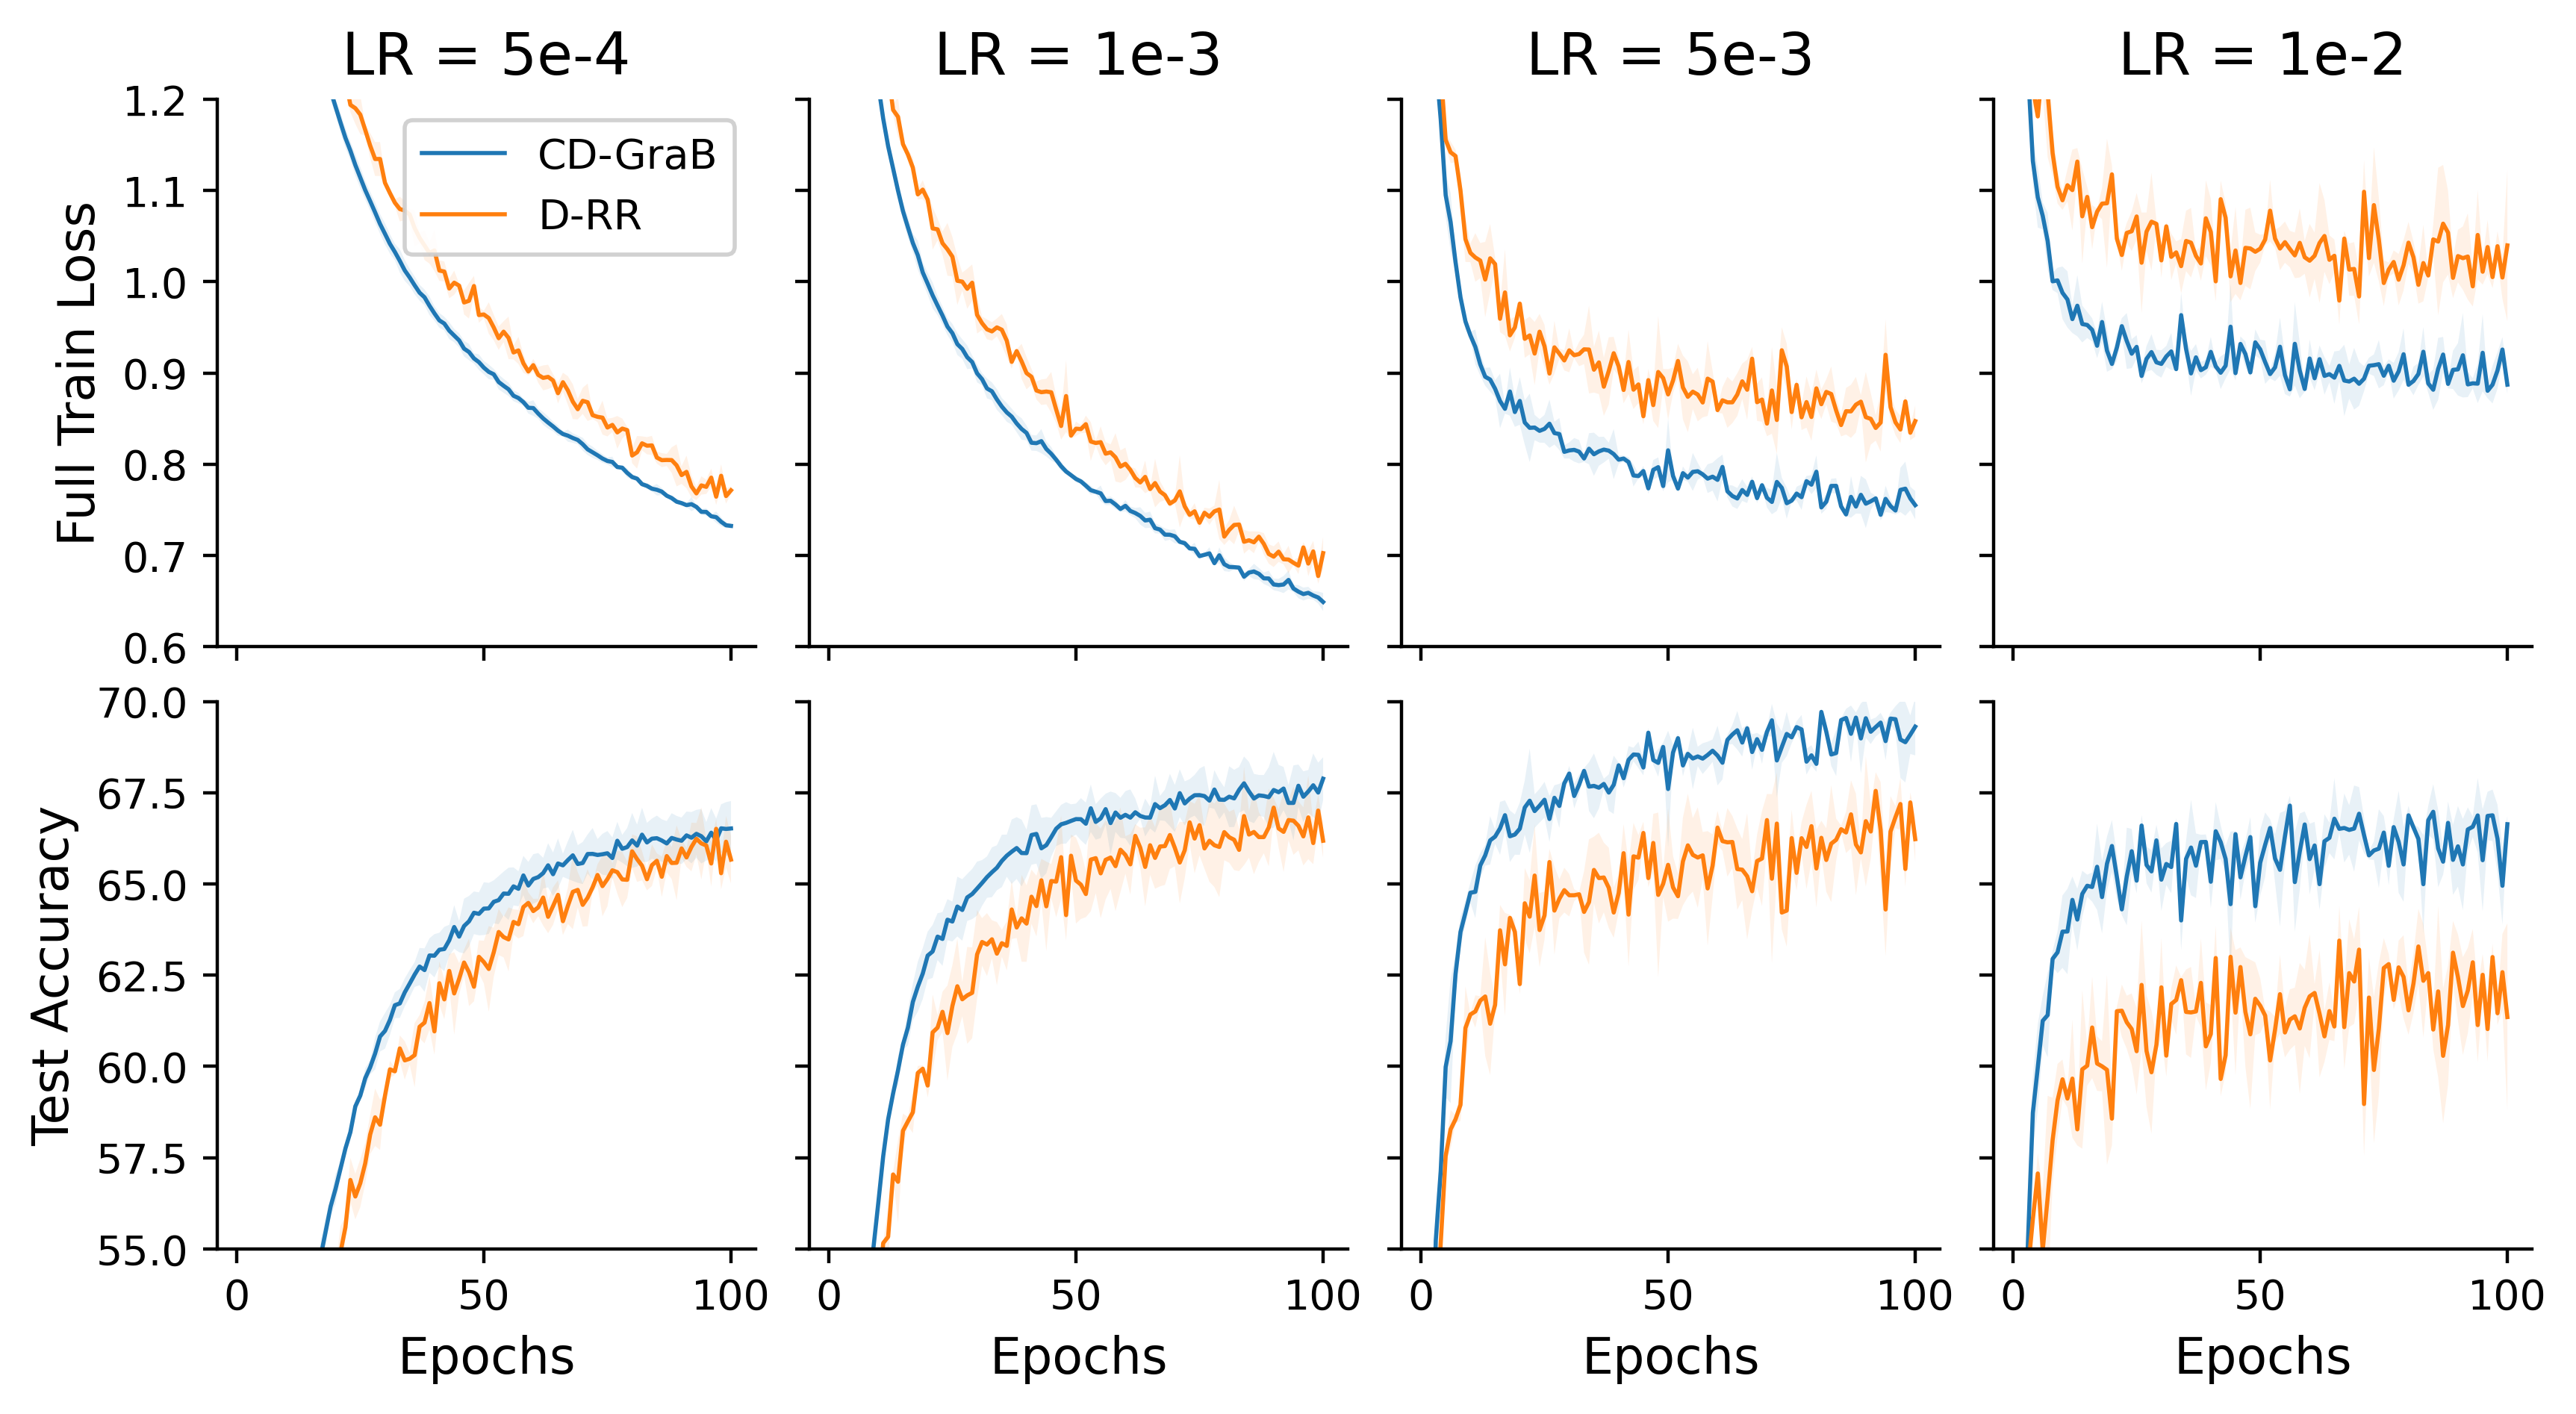

In [8]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(10, 5), dpi=400, gridspec_kw=dict(wspace=0.1, hspace=0.1), sharex=True)

for i, lr in enumerate(lrs):
  plot_res(axes[0, i], "d-pb", "CD-GraB", "train", 'loss', lr)
  plot_res(axes[0, i], "d-rr", "D-RR", "train", 'loss', lr)
  if i > 0:
    axes[0, i].set_yticklabels([])
  axes[0, i].set_ylim(0.6, 1.2)
  axes[0, 0].set_ylabel('Full Train Loss', fontsize=12)

  plot_res(axes[1, i], "d-pb", "CD-GraB", "test", 'acc', lr)
  plot_res(axes[1, i], "d-rr", "d-rr", "test", 'acc', lr)
  if i > 0:
    axes[1, i].set_yticklabels([])
  axes[1, i].set_ylim(55, 70)
  # axes[1, 0].set_yticklabels(['82.0', ])
  axes[1, i].set_xlabel('Epochs', fontsize=12)
  axes[1, 0].set_ylabel('Test Accuracy', fontsize=12)
  axes[0, i].set_title(f'LR = {lr_labels[i]}', fontsize=14)
  axes[0, i].spines[['right', 'top']].set_visible(False)
  axes[1, i].spines[['right', 'top']].set_visible(False)

axes[0, 0].legend(fontsize=10, loc='upper right', framealpha=.9)
fig.tight_layout()
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim-lr.png')
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim-lr.pdf', format="pdf", bbox_inches="tight")